In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos
ruta = "C:\\Users\\rober\\OneDrive\\Documentos\\Python proyectos\\ANALISIS_DATOS\\PASO2\\Analisis_datos_udad\\wine.data"
columnas = ["Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium", "Total Phenols", "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins", "Color Intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
data = pd.read_csv(ruta, names=columnas)

In [3]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop("Class", axis=1)
y = data["Class"]

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Configurar el modelo de árbol de decisiones con parámetros ajustados
modelo_arbol = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=5, min_samples_leaf=2)


In [7]:
# Entrenar el modelo con datos normalizados
modelo_arbol.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [8]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo_arbol.predict(X_test_scaled)

In [10]:
# Evaluar la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo de árbol de decisión:", precision)

Precisión del modelo de árbol de decisión: 0.9444444444444444


In [12]:
# Visualizar el árbol de decisiones
unique_classes = data["Class"].unique()
class_names = [str(c) for c in unique_classes]

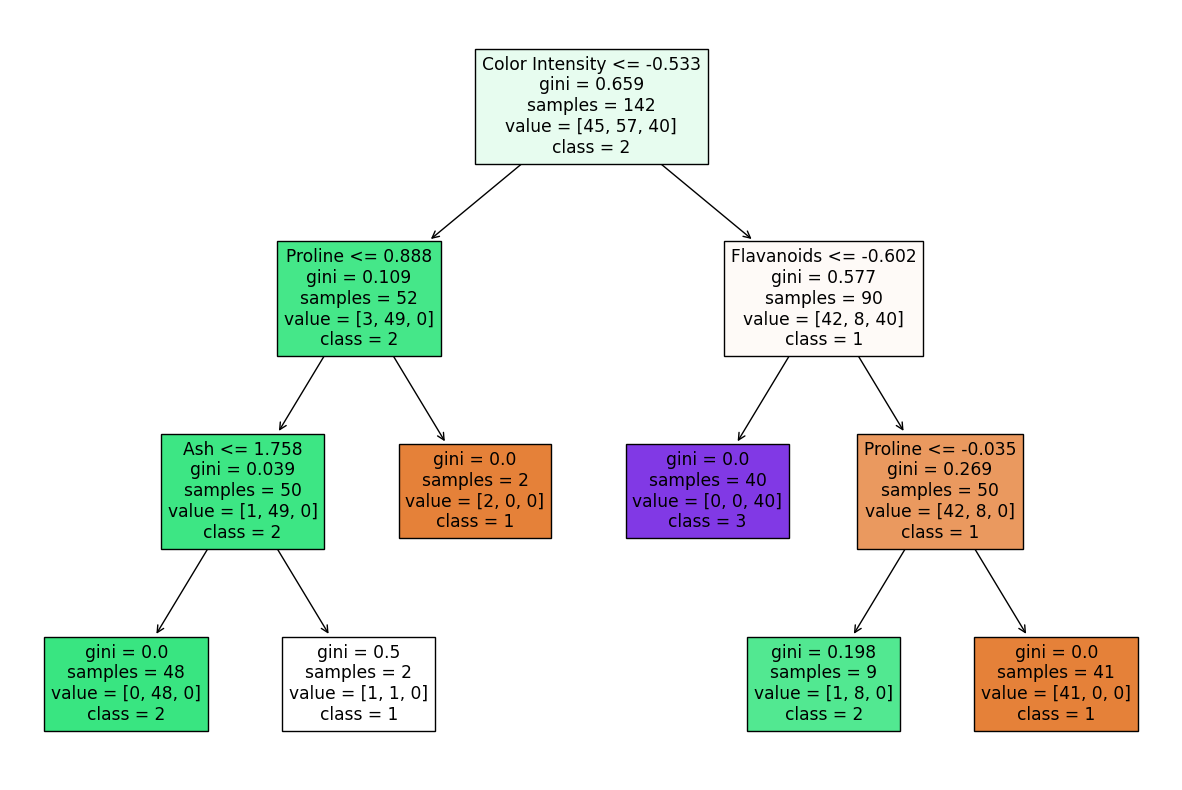

In [13]:
plt.figure(figsize=(15, 10))
plot_tree(modelo_arbol, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()